## Pre-Processing & Training

In [1]:
# !pip install category_encoders

In [2]:
# !pip install -U imbalanced-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version

from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

from sklearn.decomposition import PCA

#Standardize a dataset along any axis. Center to the mean and component wise scale to unit variance.
from sklearn.preprocessing import scale


from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve


from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Construct a Pipeline from the given estimators.
from sklearn.pipeline import make_pipeline


from sklearn.feature_selection import SelectKBest, f_regression
import datetime


In [2]:
hearts = pd.read_csv("C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Guided Capstone 2\\dummies_data.csv")

In [3]:
hearts.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,8.0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0


In [4]:
hearts['HeartDisease'].value_counts(normalize = True)

0    0.914405
1    0.085595
Name: HeartDisease, dtype: float64

91.4% values are no in Heart Disease, whereas only 8.5% are yes. 

In [5]:
X = hearts.drop(['HeartDisease'], axis = 1)
y = hearts['HeartDisease']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 0)

In [7]:
X_train.shape, y_train.shape,  X_test.shape, y_test.shape

((239846, 50), (239846,), (79949, 50), (79949,))

In [8]:
X_train.dtypes

BMI                                    float64
PhysicalHealth                         float64
MentalHealth                           float64
SleepTime                              float64
Smoking_No                               int64
Smoking_Yes                              int64
AlcoholDrinking_No                       int64
AlcoholDrinking_Yes                      int64
Stroke_No                                int64
Stroke_Yes                               int64
DiffWalking_No                           int64
DiffWalking_Yes                          int64
Sex_Female                               int64
Sex_Male                                 int64
AgeCategory_18-24                        int64
AgeCategory_25-29                        int64
AgeCategory_30-34                        int64
AgeCategory_35-39                        int64
AgeCategory_40-44                        int64
AgeCategory_45-49                        int64
AgeCategory_50-54                        int64
AgeCategory_5

In [9]:
# AJS:
print("\n")
print("X_train:", type(X_train), X_train.shape, len(X_train)) 

# AJS:
print("\n")
print("X_test", type(X_test), X_test.shape, len(X_test)) 

# AJS:
print("\n")
print("y_train", type(y_train), y_train.shape, len(y_train)) 

# AJS:
print("\n")
print("y_test", type(y_test), y_test.shape, len(y_test)) 



X_train: <class 'pandas.core.frame.DataFrame'> (239846, 50) 239846


X_test <class 'pandas.core.frame.DataFrame'> (79949, 50) 79949


y_train <class 'pandas.core.series.Series'> (239846,) 239846


y_test <class 'pandas.core.series.Series'> (79949,) 79949


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
# AJS: construct the LogisticRegression model
clf = LogisticRegression(max_iter = 500)

# Fit the model on the training data.
clf.fit(X_train, y_train) 

# Print the accuracy from the testing data.
# AJS: introduce variable to be reused later
y_predict_test = clf.predict(X_test)
print("\n")
print("[Test] Accuracy score (y_predict_test, y_test):",accuracy_score(y_predict_test, y_test))


# AJS: also printout the training score
y_predict_training = clf.predict(X_train)
print("\n")
print("[Training] Accuracy score: (ylr, y_predict_training)",accuracy_score(y_train, y_predict_training))




[Test] Accuracy score (y_predict_test, y_test): 0.9156212085204318


[Training] Accuracy score: (ylr, y_predict_training) 0.9159960974958932


Because our scores have a minimal unit difference we can see that there is no overfitting here. 

In [12]:
from sklearn import metrics
print("\n AUC-ROC:", metrics.roc_auc_score(y_test, y_predict_test))


 AUC-ROC: 0.5481488849141637


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)

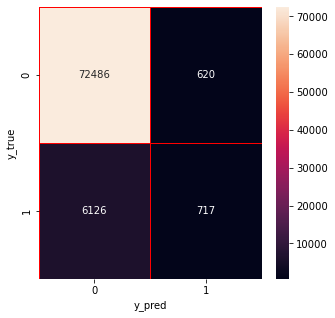

In [16]:
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [17]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report]")
print(classification_report(y_train, y_predict_training))

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96    219316
           1       0.55      0.11      0.18     20530

    accuracy                           0.92    239846
   macro avg       0.73      0.55      0.57    239846
weighted avg       0.89      0.92      0.89    239846

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     73106
           1       0.54      0.10      0.18      6843

    accuracy                           0.92     79949
   macro avg       0.73      0.55      0.57     79949
weighted avg       0.89      0.92      0.89     79949



The Class 1 does very bad in both training and test, mainly because there is imbalance in our target variable.

In [18]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [19]:
clf.fit(X_train_scaled, y_train)

y_test_pred = clf.predict(X_test_scaled)
print(accuracy_score(y_test_pred, y_test))

0.9155711766250985


In [20]:
print("\n AUC-ROC:", metrics.roc_auc_score(y_test, y_test_pred))


 AUC-ROC: 0.5482539833469406


In [21]:
# AJS: use sklearn.metrics.classification_report for a more comprehensive
# performance analysis

#AJS
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report]")
print(classification_report(y_train, y_predict_training))

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96    219316
           1       0.55      0.11      0.18     20530

    accuracy                           0.92    239846
   macro avg       0.73      0.55      0.57    239846
weighted avg       0.89      0.92      0.89    239846

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     73106
           1       0.54      0.10      0.18      6843

    accuracy                           0.92     79949
   macro avg       0.73      0.55      0.57     79949
weighted avg       0.89      0.92      0.89     79949



- We can see that we have imbalance in our target variable hence one value always does very good and the other very bad. 

- Our accuracy score tells us that our model is good but our Roc-auc score tells us that it really is not because most of the values are 0 and are being predicted correctly.

- We do see that we do not have overfitting in our model as our training and test scores are more or less the same. 

- Some of the thing we can expect in the next notebook are over-sampling and under-sampling techinques to work with imbalance, and models like LGBM, XGBoost, and others with the over/under - sampling techniques.  